In [1]:
%matplotlib inline
import numpy as np
import os
import pandas
import seaborn
import items as itemmaker
from glob import glob
from math import sqrt
from matplotlib import pyplot
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from openpyxl import load_workbook
import analyze

In [3]:
nop = 4
runs = 20
folders = ['/Users/gelliebeenz/Documents/Python/ObjectiveMethod/Static/NSGA-II/',
           '/Users/gelliebeenz/Documents/Python/ObjectiveMethod/Static/MOMAD/',
           '/Users/gelliebeenz/Documents/Python/ObjectiveMethod/Static/MOEPSO/',
           '/Users/gelliebeenz/Documents/Python/ObjectiveMethod/Static/MOMA/',
           '/Users/gelliebeenz/Documents/Python/ObjectiveMethod/Analysis/']
files = ['ApproximationSet.csv', 'ApproximationSet.csv',
         'ApproximationSet.csv', 'ApproximationSet.csv']
levels = ['SBSBPP500/']
levellabels = ['500 Items']
methods = ['NSGA-II', 'MOMAD', 'MOEPSO', 'MOMA']
colors = ['#49ADA2', '#7797F4', '#C973F4', '#EF6E8B', '#FFAA6C']
solsindex = ['level', 'number', 'method']
dfsolseries = []
seaborn.set(font_scale=1.25)
lvl = 0
r = 7
print('Analyzing Experiment{0:02d}'.format(r + 1))
runfolds = analyze.listfolders(r, lvl, nop, folders, levels)

Analyzing Experiment08


In [6]:
data, opcat = analyze.getparetofront(nop, runfolds, files)
for opal in range(nop):
    method = []
    for m in range(len(data[opal])):
        method.append(methods[opal])
    data[opal]['Method'] = method

In [26]:
seaborn.set_style('whitegrid')
plotname0 = runfolds[nop] + 'ParetoPlot3D'
plot0 = pyplot.figure().gca(projection='3d')
for opal in range(nop):
    plot0.scatter(data[opal]['No. of Bins'], data[opal]['Max. Bin Height'],
                  data[opal]['Avg. Bin Weight'], c=colors[opal], label=methods[opal],
                  linewidths=1, edgecolor="w", s=40)
plot0.set_xlabel(opcat[0], labelpad=10)
start, end = plot0.get_xlim()
plot0.xaxis.set_ticks(np.arange(start, end, 40))
plot0.set_ylabel(opcat[1], labelpad=10)
start, end = plot0.get_ylim()
plot0.yaxis.set_ticks(np.arange(start, end, 25))
plot0.set_zlabel(opcat[2], labelpad=10)
plot0.legend(bbox_to_anchor=(0, -1, 1, 1), ncol=nop)
plot0.view_init(20, 45)
pyplot.savefig(plotname0 + '.eps', format='eps', dpi=2000)
pyplot.savefig(plotname0 + '.pdf', format='pdf', dpi=2000)
pyplot.close()

In [68]:
seaborn.set_style('darkgrid')
plotname2 = runfolds[nop] + 'ParetoPlot'
dataset = pandas.concat(data, keys=methods)
scat = seaborn.PairGrid(dataset, hue='Method', palette=seaborn.color_palette(colors),
                        hue_kws={"marker": ["o", "^", "D", "s"]})
scat = scat.map_diag(pyplot.hist)
scat = scat.map_offdiag(pyplot.scatter, linewidths=1, edgecolor="w", s=40)
for ax in scat.axes.flat:
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda xax, p: format(int(xax))))
    start, end = ax.get_xlim()
    intervals = round((end - start) / 5, -1)
    ax.set(xticks=np.arange(start, end+1, intervals))
    start, end = ax.get_ylim()
    intervals = round((end - start) / 5, -1)
    ax.set(yticks=np.arange(start, end+1, intervals))
    pyplot.setp(ax.get_xticklabels(), rotation=45)
scat.add_legend(title=None, frameon=True)
scat.fig.get_children()[-1].set_bbox_to_anchor((1, 0.878, 0, 0))
pyplot.savefig(plotname2+'.eps', format='eps', dpi=4000, bbox_inches='tight')
pyplot.savefig(plotname2+'.pdf', format='pdf', dpi=4000, bbox_inches='tight')
pyplot.close()

Analyzing Experiment01
Analyzing Experiment02
Analyzing Experiment03
Analyzing Experiment04
Analyzing Experiment05
Analyzing Experiment06
Analyzing Experiment07
Analyzing Experiment08
Analyzing Experiment09
Analyzing Experiment10
Analyzing Experiment11
Analyzing Experiment12
Analyzing Experiment13
Analyzing Experiment14
Analyzing Experiment15
Analyzing Experiment16
Analyzing Experiment17
Analyzing Experiment18
Analyzing Experiment19
Analyzing Experiment20


Combining indicators.


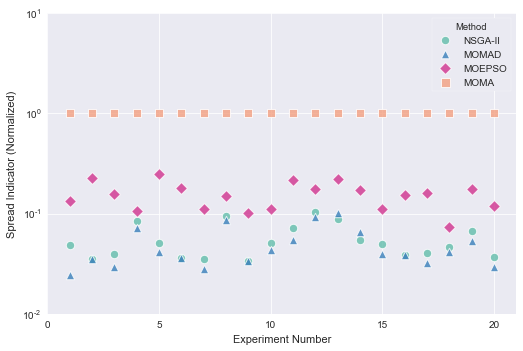